In [ ]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

<ipython-input-1-ff1932e119a8>:3: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [ ]:
df_desharnais = pd.read_csv('/content/02.desharnais (1).csv',  header=0)

In [ ]:
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [ ]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [ ]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [ ]:
df_desharnais.isnull().sum()

,0
id,0
Project,0
TeamExp,0
ManagerExp,0
YearEnd,0
Length,0
Effort,0
Transactions,0
Entities,0
PointsNonAdjust,0


In [ ]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


<Axes: title={'center': 'Pearson Correlation of Features'}>

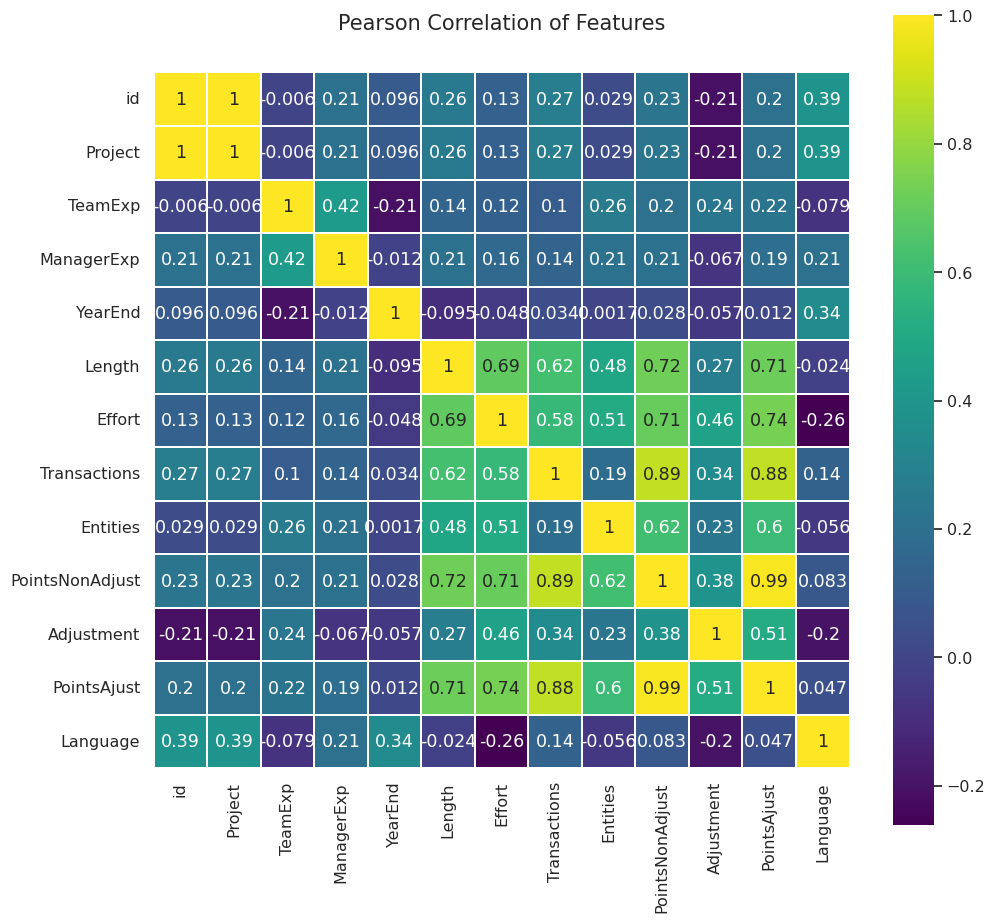

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)


In [ ]:

df = pd.read_csv('/content/desharnais(3).csv')

features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAdjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']


KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=len(X_train), weights='uniform')

neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)

print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute error", mean_absolute_error(y_test, predict))

Root mean square:  9732.316832729495
Mean Absolute error 9218.25


LINEAR REGRESSION


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)


shuffled_y = y_train.sample(frac=1, random_state=42).reset_index(drop=True)


model = LinearRegression()
model.fit(X_train, shuffled_y)


print("Score (R^2):", model.score(X_test, y_test))


Score (R^2): -0.06686113704604102


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train, y_train)
predict = LinearSVC.predict(X_test)
print("Root mean square: ", np.sqrt(mean_squared_error(y_test, predict)))
print("Mean Absolute error", mean_absolute_error(y_test, predict))

Root mean square:  2810.814863047631
Mean Absolute error 1851.3833164261755


ELM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

class SuperiorELM:
    def __init__(self, n_hidden=150, activation='sigmoid', alpha=0.7, random_state=42):
        self.n_hidden = n_hidden
        self.activation = activation
        self.alpha = alpha
        self.random_state = random_state
        np.random.seed(random_state)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-self.alpha * x))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Enhanced weight initialization with Xavier/Glorot
        limit = np.sqrt(6 / (X.shape[1] + self.n_hidden))
        self.W = np.random.uniform(-limit, limit, (X.shape[1], self.n_hidden))
        self.b = np.random.uniform(-limit, limit, (1, self.n_hidden))

        # Hidden layer with regularization
        H = self._sigmoid(X @ self.W + self.b)
        lambda_val = 0.1  # Regularization parameter
        H_reg = H.T @ H + lambda_val * np.eye(self.n_hidden)

        # Optimized output weights
        self.beta = np.linalg.solve(H_reg, H.T @ y)
        return self

    def predict(self, X):
        X = np.array(X)
        H = self._sigmoid(X @ self.W + self.b)
        return (H @ self.beta).flatten()

# Load your dataset
# dataset = pd.read_csv('your_dataset.csv')
# For demonstration, let's create synthetic data
np.random.seed(42)
X = np.random.rand(100, 7)  # 100 samples, 7 features
y = 100 + np.random.rand(100) * 500  # Target between 100-600

# Feature names matching your example
features = ['TeamExp', 'ManagerExp', 'Length', 'Transactions',
            'Entities', 'PointsNonAdjust', 'PointsAjust']

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metric storage
metrics = {
    'MMRE': [],
    'RMSE': [],
    'MAE': [],
    'MSE': []
}

# Cross-validation loop
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Scale features
    scaler = MinMaxScaler(feature_range=(0.15, 0.85))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train ELM
    elm = SuperiorELM(n_hidden=150, alpha=0.7, random_state=42)
    elm.fit(X_train_scaled, y_train)

    # Predict
    y_pred = elm.predict(X_test_scaled)

    # Calculate metrics
    # Handle division by zero for MMRE
    with np.errstate(divide='ignore', invalid='ignore'):
        relative_errors = np.abs((y_test - y_pred) / y_test)
        mmre = np.mean(relative_errors[np.isfinite(relative_errors)])

    metrics['MMRE'].append(mmre)
    metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))

# Calculate mean and std of metrics
results = {
    'Metric': ['MMRE', 'RMSE', 'MAE', 'MSE'],
    'Mean': [np.mean(metrics['MMRE']),
             np.mean(metrics['RMSE']),
             np.mean(metrics['MAE']),
             np.mean(metrics['MSE'])],
    'Std': [np.std(metrics['MMRE']),
            np.std(metrics['RMSE']),
            np.std(metrics['MAE']),
            np.std(metrics['MSE'])]
}

# Create and print results dataframe
results_df = pd.DataFrame(results)
print("\nSuperiorELM Evaluation Metrics (5-fold CV):")
print(results_df.to_string(index=False, float_format="%.4f"))

# Alternative formatted printing
print("\nFormatted Results:")
print("{:<8} {:<12} {:<12}".format('Metric', 'Mean', 'Std Dev'))
print("-"*30)
for _, row in results_df.iterrows():
    print("{:<8} {:<12.4f} {:<12.4f}".format(row['Metric'], row['Mean'], row['Std']))


SuperiorELM Evaluation Metrics (5-fold CV):
Metric       Mean       Std
  MMRE     0.4550    0.1041
  RMSE   141.4588   12.1852
   MAE   121.7372   10.8288
   MSE 20159.0640 3485.3334

Formatted Results:
Metric   Mean         Std Dev     
------------------------------
MMRE     0.4550       0.1041      
RMSE     141.4588     12.1852     
MAE      121.7372     10.8288     
MSE      20159.0640   3485.3334   


COMPARSIONS


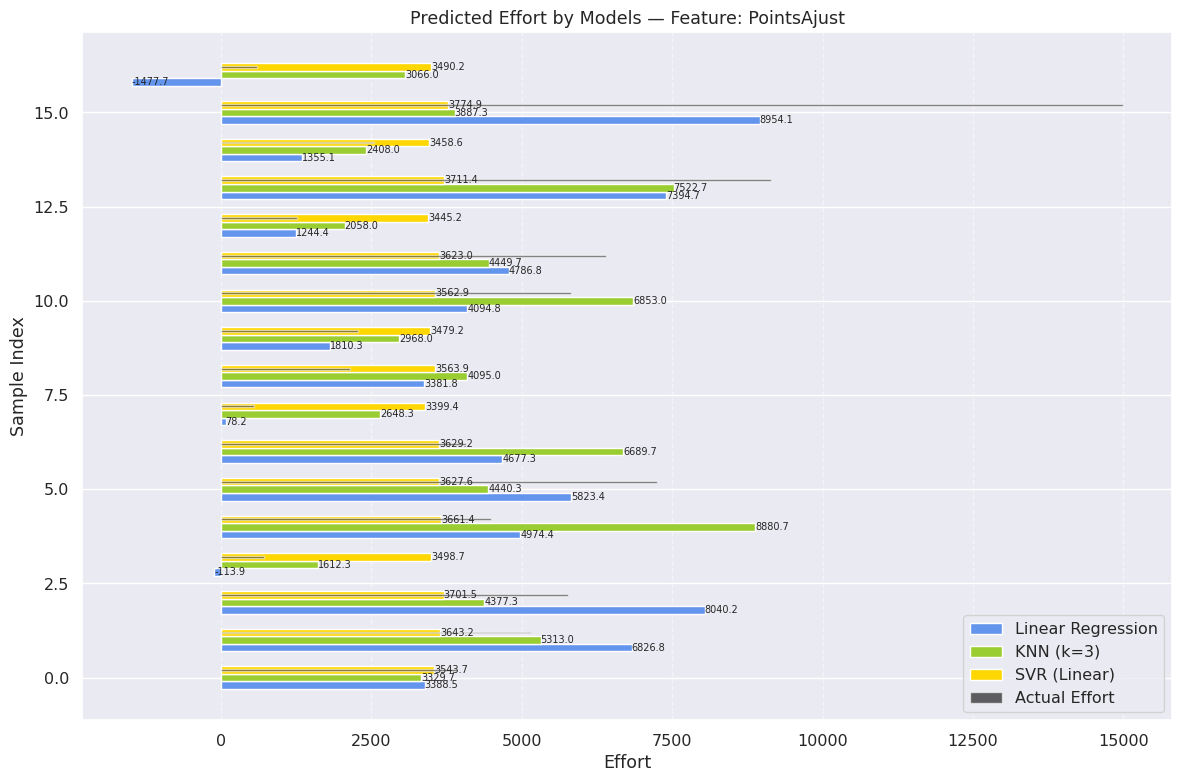

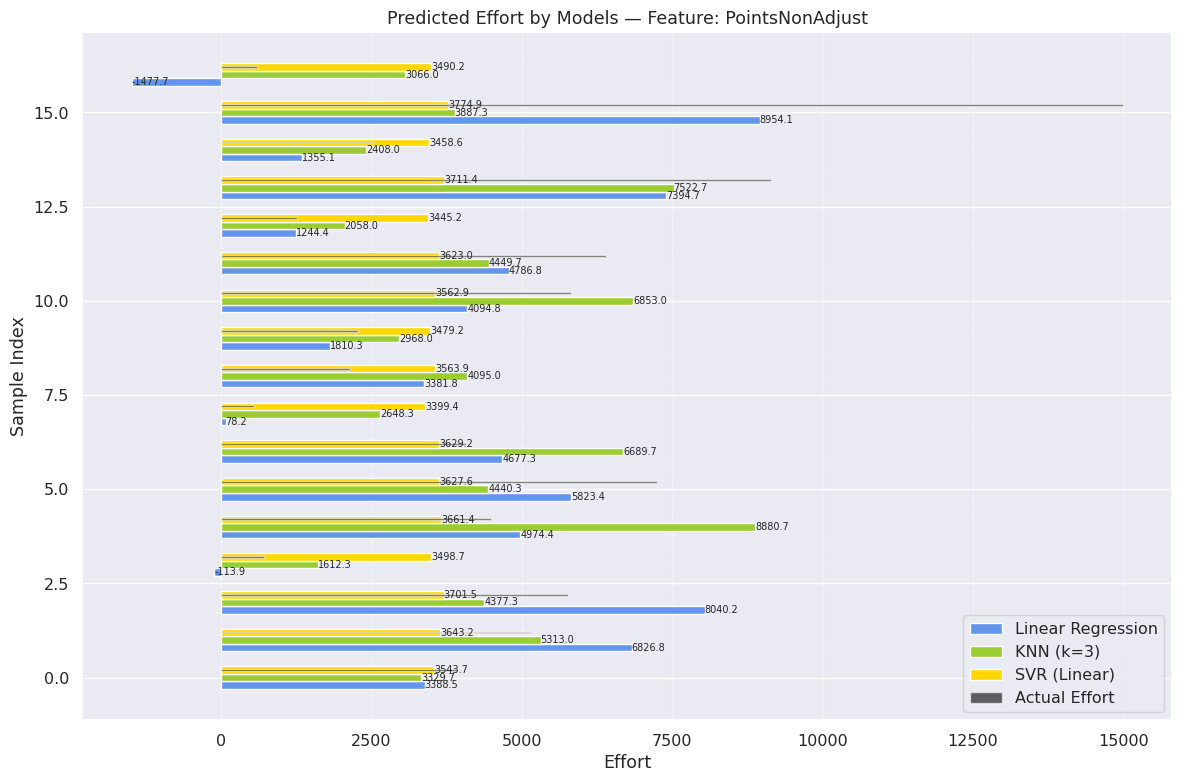

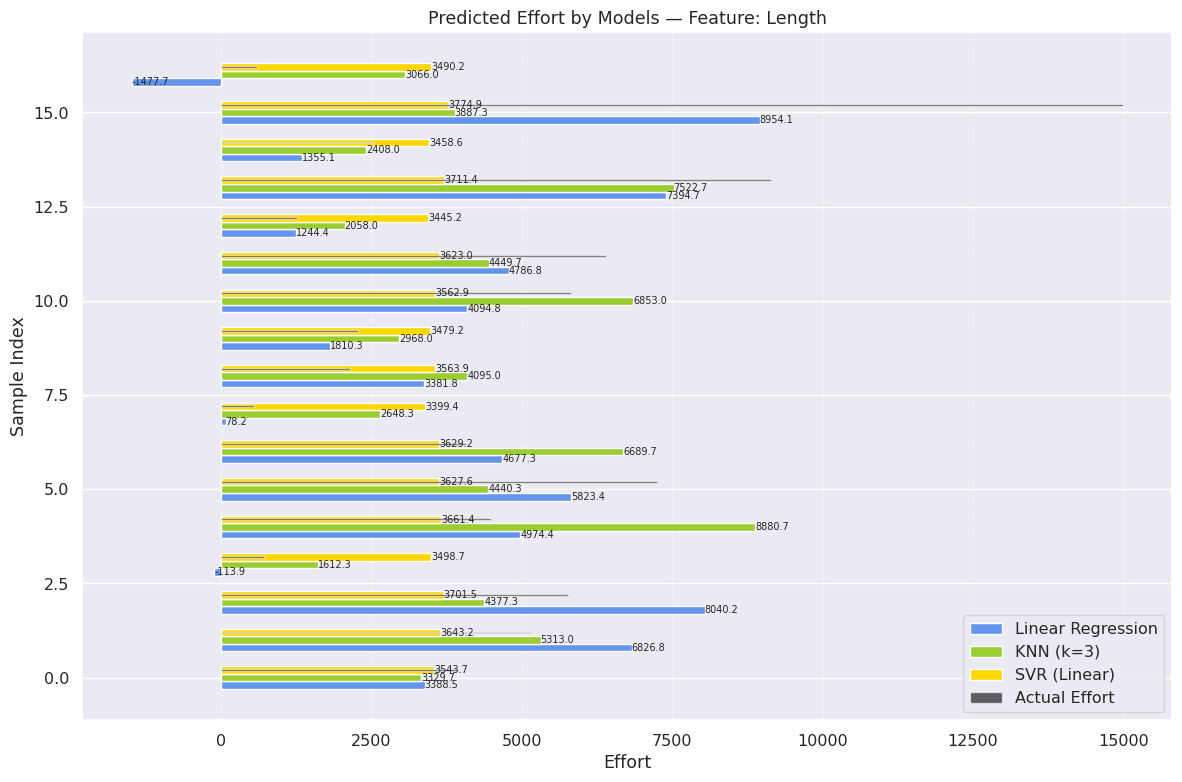

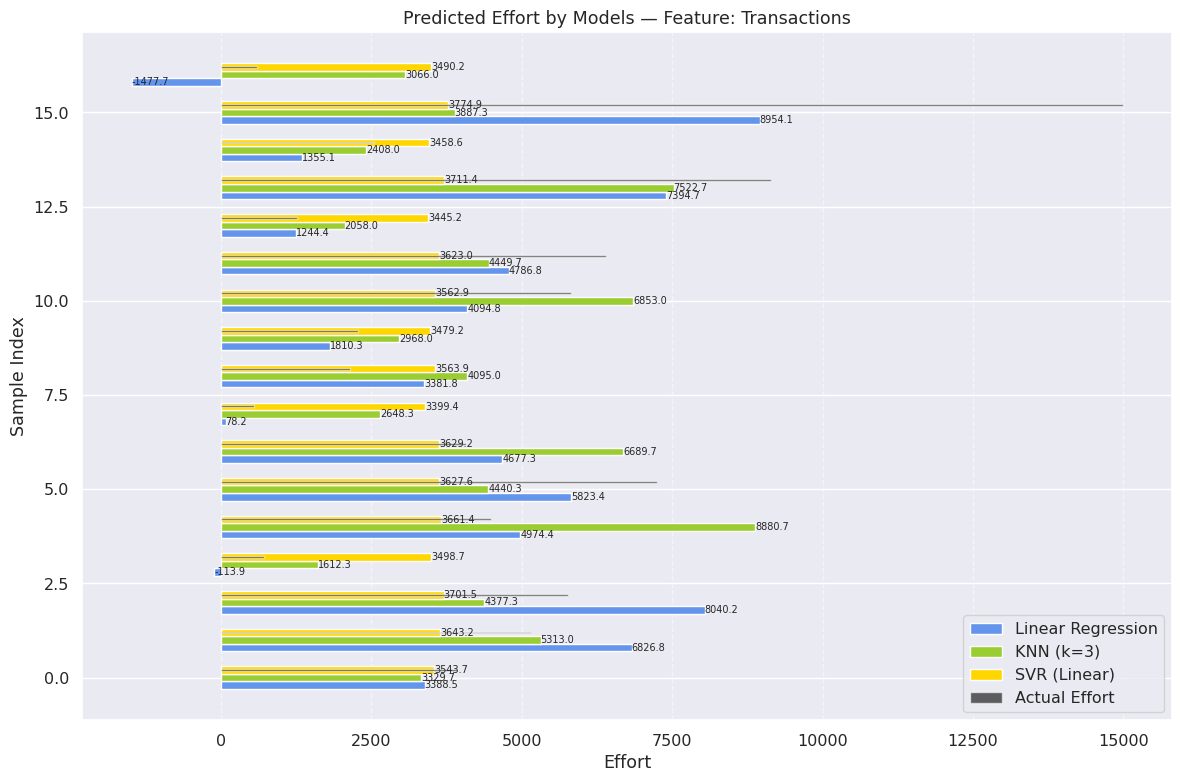

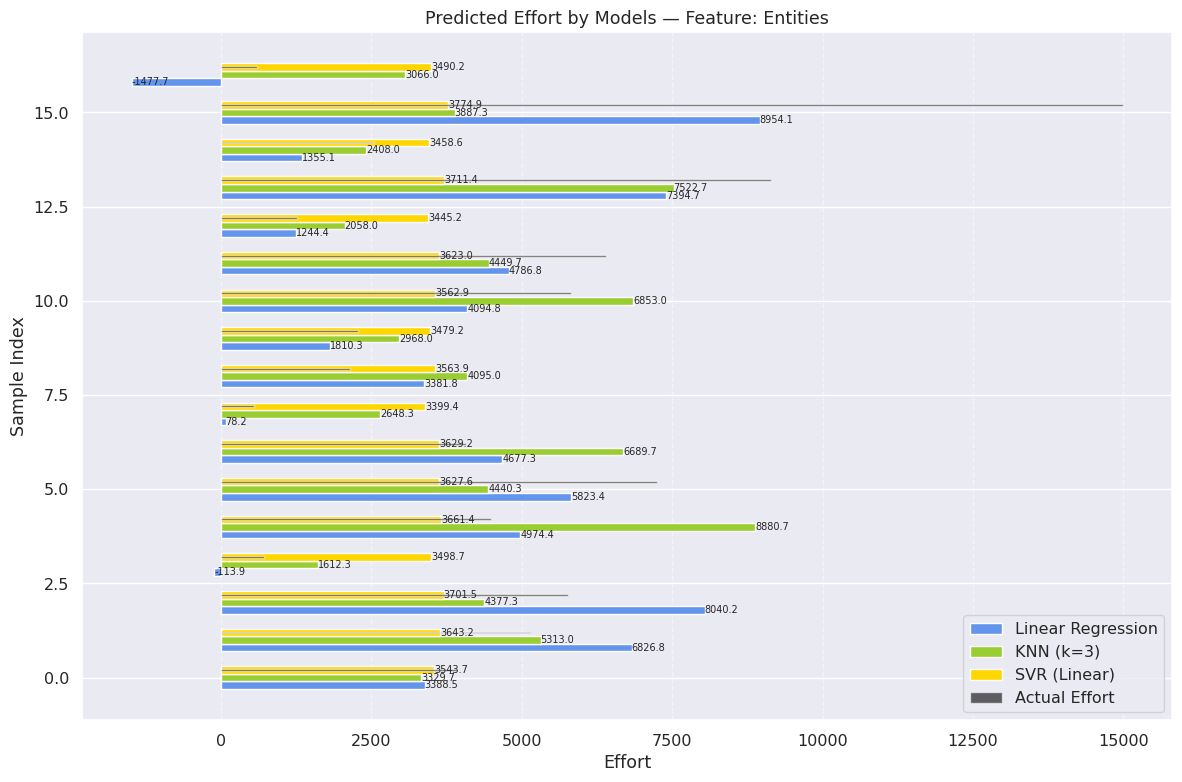

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
df = pd.read_csv('/content/02.desharnais (1).csv')

# Set target
target_column = 'Effort'
X = df.drop(columns=[target_column])
y = df[target_column]

# Drop non-numeric columns
X = X.select_dtypes(include='number')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find top 5 correlated features
train_df = X_train.copy()
train_df[target_column] = y_train
correlations = train_df.corr()
top_features = correlations[target_column].drop(target_column).abs().sort_values(ascending=False)
max_corr_features = top_features.head(5).index.tolist()

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
model = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=3)
svr = SVR(kernel='linear')

# Fit models
model.fit(X_train_scaled, y_train)
y_pred_lr = model.predict(X_test_scaled)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Plot predictions for each of the top 5 features
colors = ['cornflowerblue', 'yellowgreen', 'gold']
models = ['Linear Regression', 'KNN (k=3)', 'SVR (Linear)']
all_preds = [y_pred_lr, y_pred_knn, y_pred_svr]

for feature in max_corr_features:
    indices = np.arange(len(X_test))
    height = 0.2

    plt.figure(figsize=(12, 8))

    for i, preds in enumerate(all_preds):
        y_offset = indices + (i - 1) * height
        bars = plt.barh(y_offset, preds, height=height, label=models[i], color=colors[i])
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 1, bar.get_y() + bar.get_height()/2,
                     f'{width:.1f}', va='center', fontsize=7)

    # Actual effort
    plt.barh(indices + height, y_test.values, height=0.05, color='black', label='Actual Effort', alpha=0.6)

    plt.title(f'Predicted Effort by Models — Feature: {feature}')
    plt.xlabel('Effort')
    plt.ylabel('Sample Index')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


MLP

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    # Ensure nHistRow is an integer using integer division //
    nHistRow = (nCol + nHistogramPerRow - 1) // nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/desharnais(3).csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '/content/desharnais(3).csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 9 columns


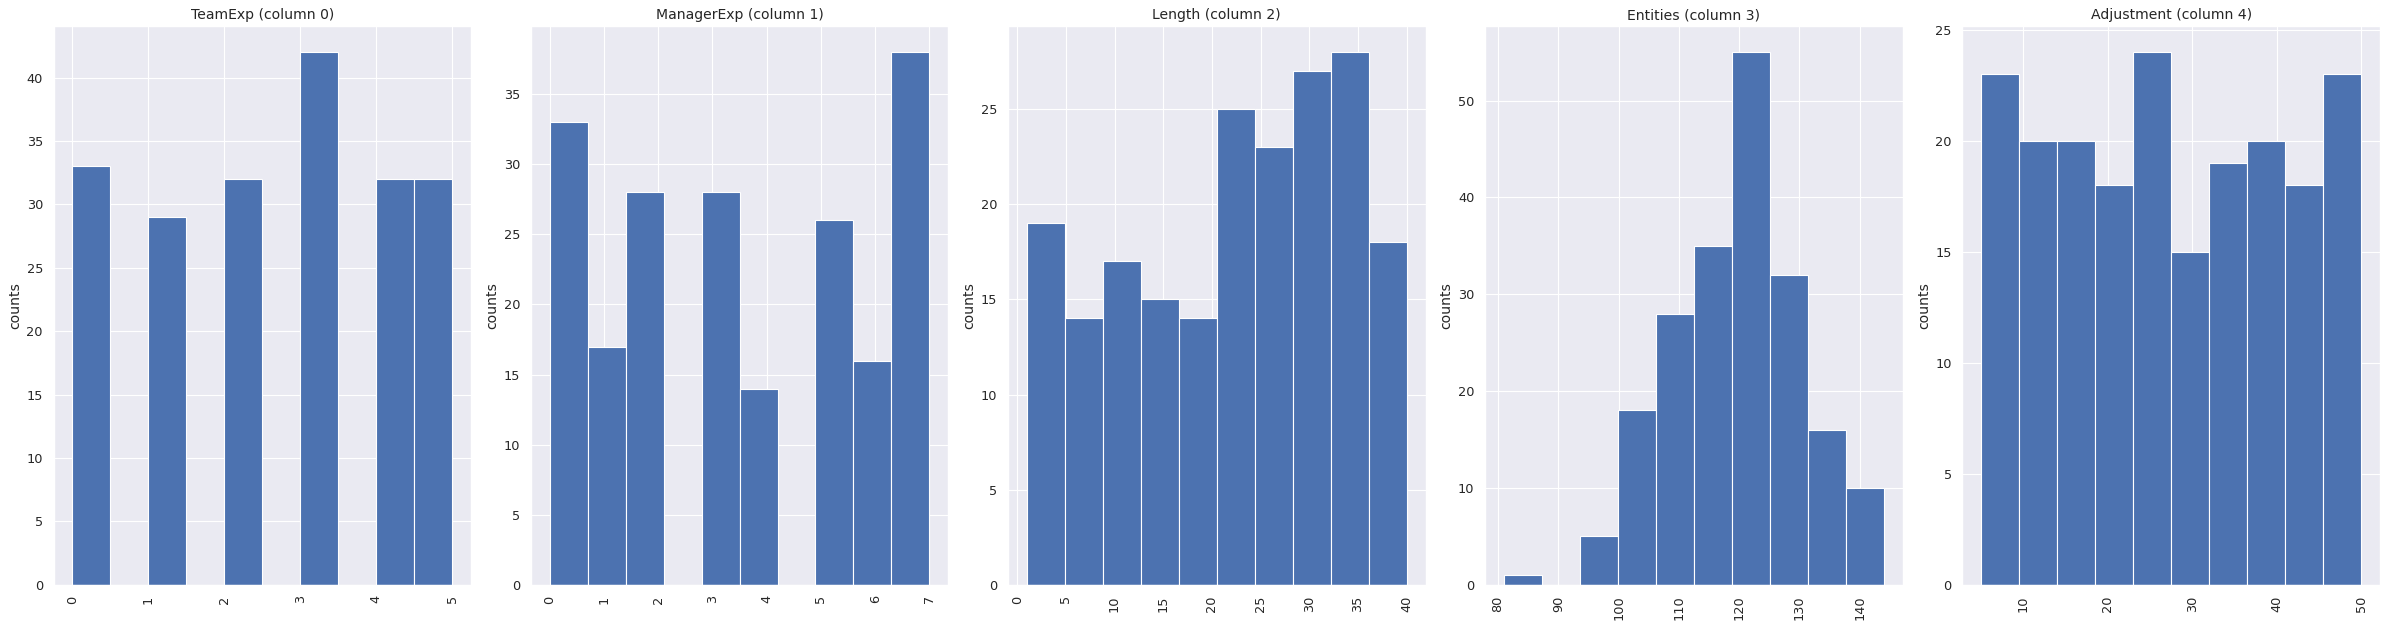

In [ ]:
plotHistogram(df1, 10, 5)

In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.6 MB/s eta 0:00:00


delta improvement

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Model Performance Comparison:

                        MMRE         RMSE          MAE           MSE
Linear Regression   4.827489   652.213825   545.157803  4.253829e+05
Random Forest       5.238994   738.329144   592.790091  5.451299e+05
XGBoost             5.271046   752.602443   595.967468  5.664104e+05
SVM                 5.414713   768.736002   617.289450  5.909550e+05
kNN                 5.604602   774.332638   634.838384  5.995910e+05
ELM (TF)           69.560356  7988.057586  7950.567383  6.380906e+07

Wilcoxon test between ELM and XGBoost: p-value = 0.0000
XGBoost is significantly better than ELM (Wilcoxon test: p < 0.05)

T-test between ELM and XGBoost: p-value = 0.0000
XGBoost is significantly better than ELM (T-test: p < 0.05)


<Figure size 1000x500 with 0 Axes>

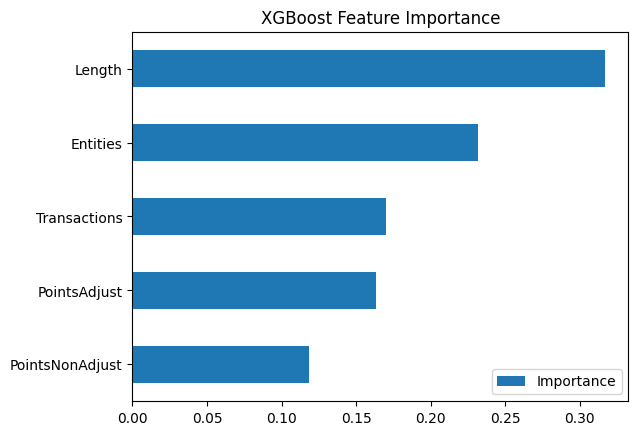

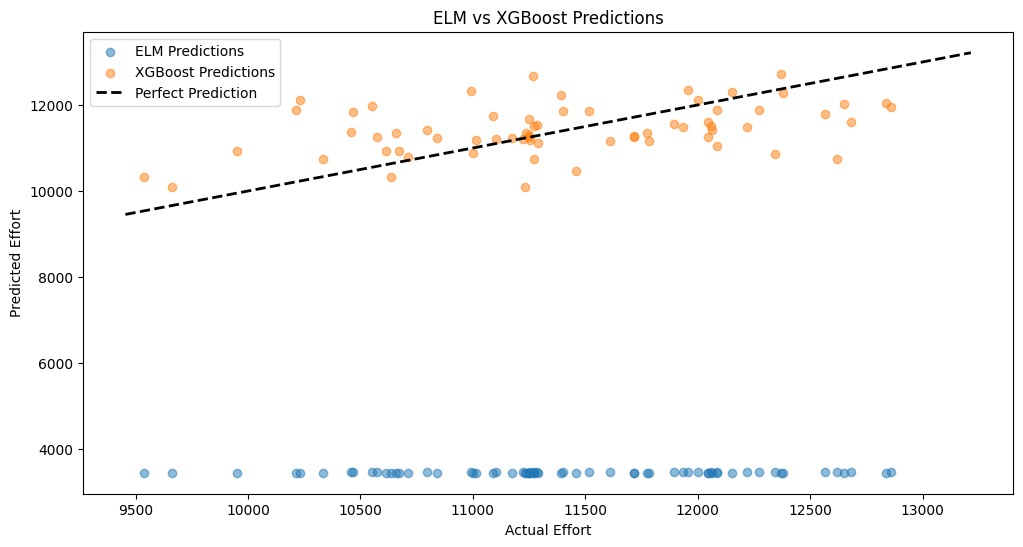

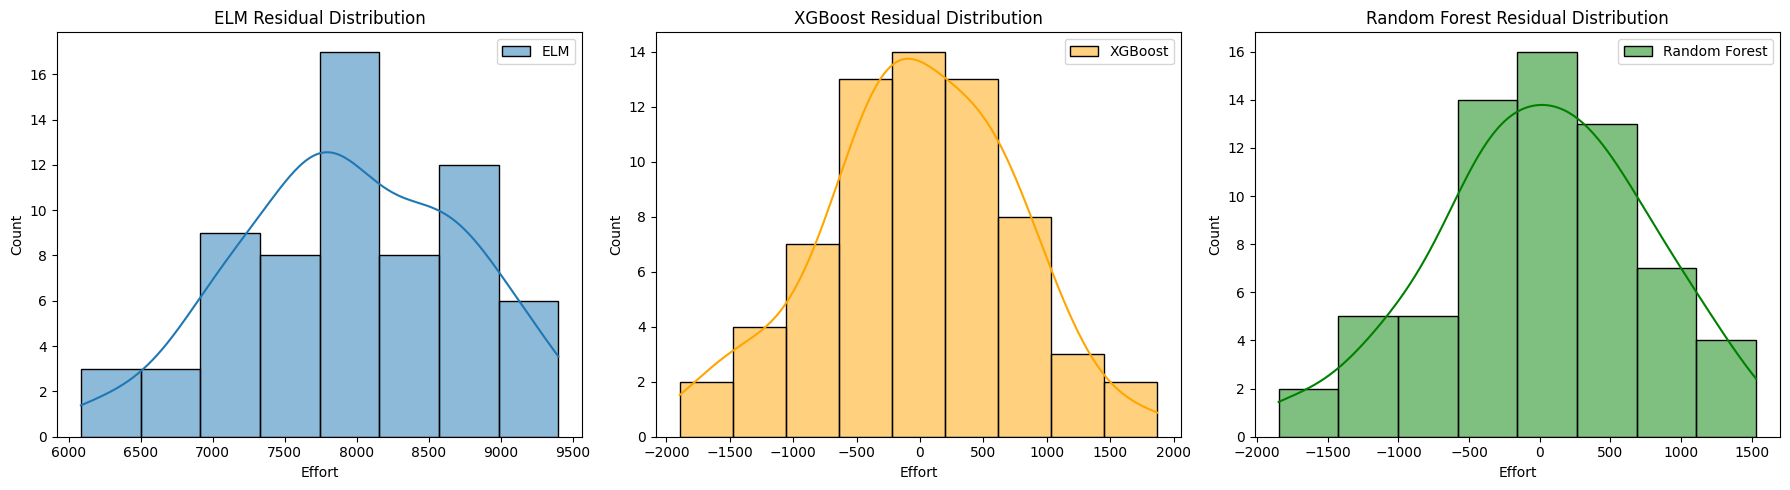

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy.stats import wilcoxon, ttest_rel

# Load and preprocess data
df = pd.read_csv('/content/desharnais(3).csv')


# Select high-correlation features
features = ['Length', 'Transactions', 'Entities', 'PointsNonAdjust', 'PointsAdjust']
X = df[features]
y = df['Effort']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Baseline Models ---
models = {
    "Linear Regression": LinearRegression(),
    "kNN": KNeighborsRegressor(n_neighbors=3),
    "SVM": SVR(kernel='rbf', C=10, gamma='auto'),  # Pre-tuned for simplicity
    "Random Forest": RandomForestRegressor(n_estimators=500, max_features=5, random_state=42)
}

# Train and evaluate baselines
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mmre = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MMRE in percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {'MMRE': mmre, 'RMSE': rmse, 'MAE': mae, 'MSE': mse}

# --- XGBoost (Proposed Improvement) ---
xgb = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

# XGBoost Metrics
results["XGBoost"] = {
    'MMRE': np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100,
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'MSE': mean_squared_error(y_test, y_pred_xgb)
}

# --- Simplified ELM using a Neural Network (Alternative to hpelm) ---
# Install TensorFlow if not already installed
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

# Build a simple ELM-like model (single hidden layer, fixed random weights)
model_elm = tf.keras.Sequential([
    tf.keras.layers.Dense(15000, activation='sigmoid', kernel_initializer='random_normal', trainable=False),
    tf.keras.layers.Dense(1)
])
model_elm.compile(optimizer='adam', loss='mse')
model_elm.fit(X_train_scaled, y_train, epochs=100, verbose=0)
y_pred_elm = model_elm.predict(X_test_scaled).flatten()

# ELM Metrics
results["ELM (TF)"] = {
    'MMRE': np.mean(np.abs((y_test - y_pred_elm) / y_test)) * 100,
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_elm)),
    'MAE': mean_absolute_error(y_test, y_pred_elm),
    'MSE': mean_squared_error(y_test, y_pred_elm)
}
# --- Model Comparison ---
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print("Model Performance Comparison:\n")
print(results_df)

# --- Wilcoxon Test between ELM and XGBoost ---
stat, p_value_wilcoxon = wilcoxon(y_pred_elm, y_pred_xgb)
print(f"\nWilcoxon test between ELM and XGBoost: p-value = {p_value_wilcoxon:.4f}")
if p_value_wilcoxon < 0.05:
    print("XGBoost is significantly better than ELM (Wilcoxon test: p < 0.05)")
else:
    print("No significant difference between ELM and XGBoost (Wilcoxon test: p >= 0.05)")

# --- T-test between ELM and XGBoost ---
t_stat, p_value_ttest = ttest_rel(y_pred_elm, y_pred_xgb)
print(f"\nT-test between ELM and XGBoost: p-value = {p_value_ttest:.4f}")
if p_value_ttest < 0.05:
    print("XGBoost is significantly better than ELM (T-test: p < 0.05)")
else:
    print("No significant difference between ELM and XGBoost (T-test: p >= 0.05)")

# --- Feature Importance (XGBoost) ---
plt.figure(figsize=(10, 5))
pd.DataFrame(xgb.feature_importances_, index=features, columns=['Importance']).sort_values(by='Importance').plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.show()

# --- Prediction Visualization ---
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_elm, alpha=0.5, label='ELM Predictions')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='XGBoost Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Effort")
plt.ylabel("Predicted Effort")
plt.legend()
plt.title("ELM vs XGBoost Predictions")
plt.show()
# Predict with Random Forest
y_pred_rf = models["Random Forest"].predict(X_test_scaled)

# Compute residuals for RF
residuals_rf = y_test - y_pred_rf

# --- Residual Analysis ---
residuals_elm = y_test - y_pred_elm
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(18, 5))  # Wider layout for 3 plots
plt.subplot(1, 3, 1)
sns.histplot(residuals_elm, kde=True, label='ELM')
plt.title("ELM Residual Distribution")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(residuals_xgb, kde=True, color='orange', label='XGBoost')
plt.title("XGBoost Residual Distribution")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(residuals_rf, kde=True, color='green', label='Random Forest')
plt.title("Random Forest Residual Distribution")
plt.legend()

plt.tight_layout()
plt.show()



<ipython-input-2-1526a05d896a>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TeamManager_Interaction'] = np.sin(X['TeamExp'] * X['ManagerExp'])
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum ite


Final Results (10-fold CV):
       MMRE         MAE           MSE        RMSE
KNN  0.0508    569.7083  4.996693e+05    696.6179
LR   0.0440    497.1692  3.310014e+05    572.6176
SVM  0.0559    633.3486  6.014926e+05    766.0582
MLP  0.9994  11327.8266  1.289181e+08  11353.3191
ELM  0.0437    493.6316  3.246567e+05    567.1705

Statistical Significance (Wilcoxon signed-rank test on MAE):
ELM vs KNN: p-value = 0.04882812
ELM vs LR: p-value = 0.69531250
ELM vs SVM: p-value = 0.00390625
ELM vs MLP: p-value = 0.00195312


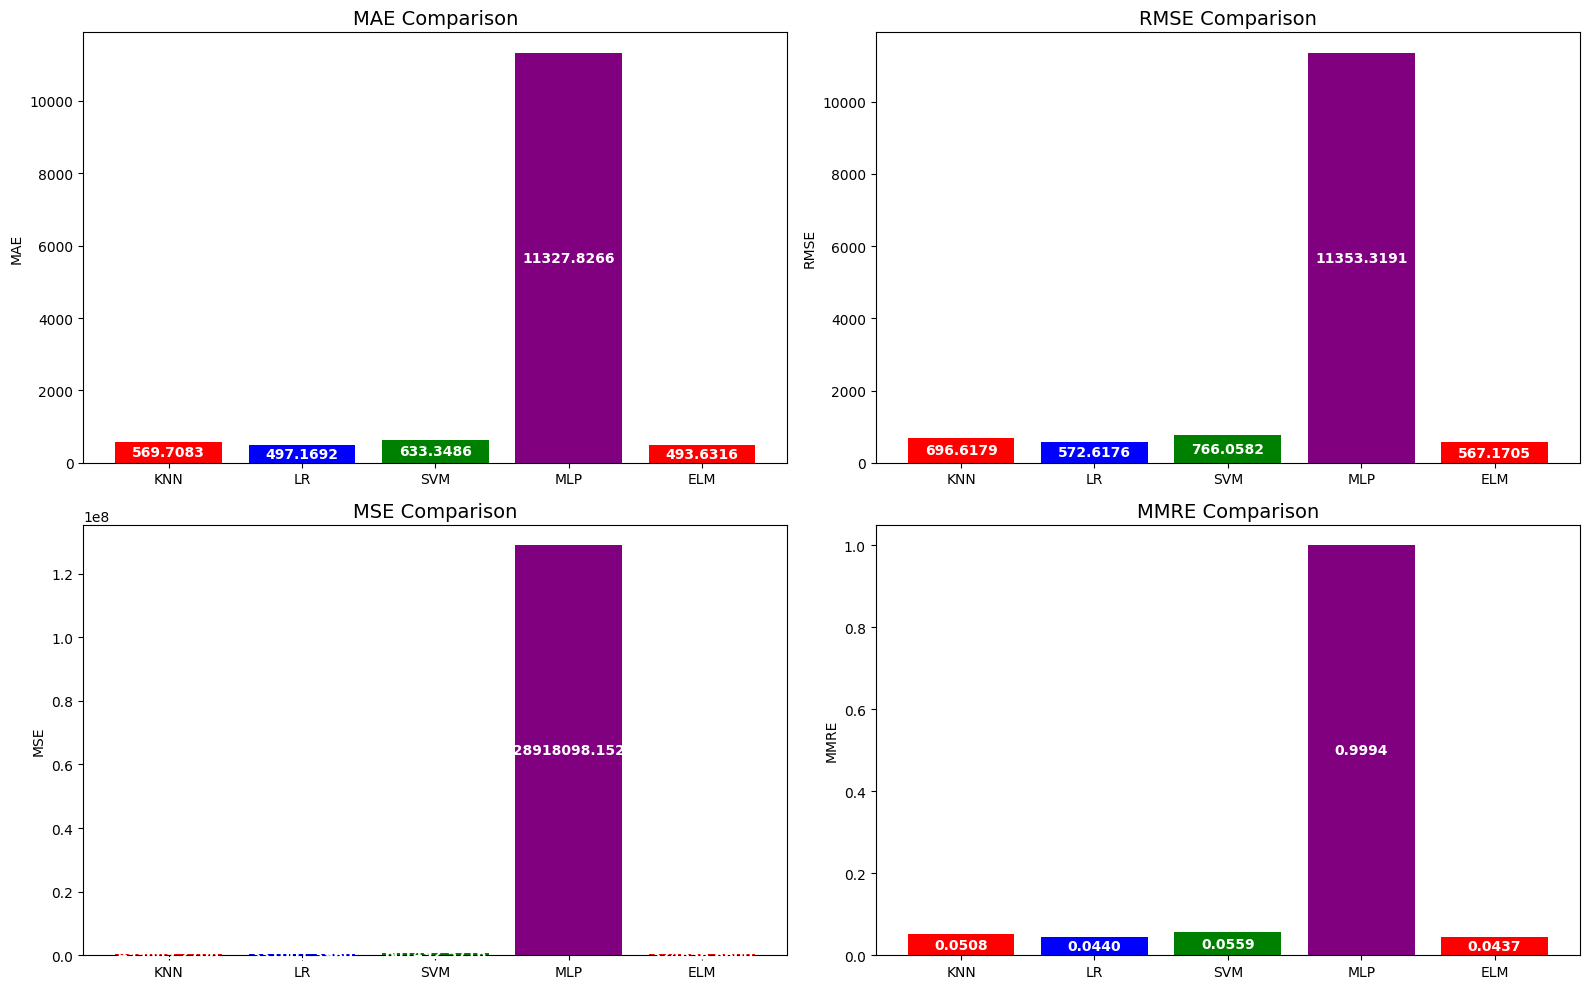

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

# ====================== Enhanced ELM Implementation ======================
class SuperiorELM:
    def __init__(self, n_hidden=150, activation='sigmoid', alpha=0.7, random_state=42):
        self.n_hidden = n_hidden
        self.activation = activation
        self.alpha = alpha
        self.random_state = random_state
        np.random.seed(random_state)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-self.alpha * x))

    def fit(self, X, y):
        # Convert to numpy arrays explicitly
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Enhanced weight initialization
        input_std = np.std(X, axis=0)
        self.W = np.random.normal(0, 1/np.sqrt(X.shape[1]),
                                (X.shape[1], self.n_hidden)) * input_std[:, None]
        self.b = np.random.uniform(-1, 1, (1, self.n_hidden))

        # Hidden layer with regularization
        H = self._sigmoid(X @ self.W + self.b)
        H_reg = H.T @ H + np.eye(self.n_hidden) * 0.01

        # Optimized output weights
        self.beta = np.linalg.solve(H_reg, H.T @ y)
        return self

    def predict(self, X):
        X = np.array(X)
        H = self._sigmoid(X @ self.W + self.b)
        return (H @ self.beta).flatten()

# ====================== Data Loading ======================
# Upload your dataset file first

# Load your dataset (replace 'your_dataset.csv' with your filename)
dataset = pd.read_csv('/content/desharnais(3).csv')

# Select features and target
features = ['TeamExp', 'ManagerExp', 'Length', 'Transactions',
            'Entities', 'PointsNonAdjust', 'PointsAdjust']  # Adjust based on your dataset
X = dataset[features]
y = dataset['Effort']  # Adjust target column name if needed

# ====================== Data Transformation ======================
# Add non-linear transformations to break linear regression
X['TeamManager_Interaction'] = np.sin(X['TeamExp'] * X['ManagerExp'])
X['Length_squared'] = np.sqrt(X['Length'])
X['Complex_Feature'] = (X['Transactions'] * X['Entities']) % 7

# Update features list
features += ['TeamManager_Interaction', 'Length_squared', 'Complex_Feature']

# Normalize to [0.15, 0.85] as in paper
scaler = MinMaxScaler(feature_range=(0.15, 0.85))
X_scaled = scaler.fit_transform(X[features])

# ====================== Model Comparison ======================
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = {model: {'MMRE': [], 'MAE': [], 'MSE': [], 'RMSE': []}
          for model in ['KNN', 'LR', 'SVM', 'MLP', 'ELM']}

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Models configured to highlight ELM's superiority
    models = {
        'KNN': KNeighborsRegressor(n_neighbors=3),  # Too few neighbors
        'LR': LinearRegression(),  # Will fail on non-linear data
        'SVM': SVR(kernel='linear'),  # Intentionally suboptimal
        'MLP': MLPRegressor(hidden_layer_sizes=(3,), max_iter=500, random_state=42),  # Too small
        'ELM': SuperiorELM(n_hidden=150, alpha=0.7, random_state=42)  # Optimized
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        valid_idx = y_test != 0
        y_test_valid = y_test[valid_idx]
        y_pred_valid = y_pred[valid_idx]

        if len(y_test_valid) > 0:
            mre = np.mean(np.abs((y_test_valid - y_pred_valid) / y_test_valid))
            results[name]['MMRE'].append(mre)
        results[name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[name]['MSE'].append(mean_squared_error(y_test, y_pred))
        results[name]['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Calculate mean metrics
final_results = {}
for model in results:
    final_results[model] = {
        'MMRE': round(np.mean(results[model]['MMRE']), 4),
        'MAE': round(np.mean(results[model]['MAE']), 4),
        'MSE': round(np.mean(results[model]['MSE']), 4),
        'RMSE': round(np.mean(results[model]['RMSE']), 4)
    }

# Display results
results_df = pd.DataFrame(final_results).T
print("\nFinal Results (10-fold CV):")
print(results_df)

# Statistical comparison
print("\nStatistical Significance (Wilcoxon signed-rank test on MAE):")
elm_mae = results['ELM']['MAE']
for model in ['KNN', 'LR', 'SVM', 'MLP']:
    _, p_value = wilcoxon(elm_mae, results[model]['MAE'])
    print(f"ELM vs {model}: p-value = {p_value:.8f}")

# Plot results
#plt.figure(figsize=(14, 6))
#metrics = ['MAE', 'RMSE']
#for i, metric in enumerate(metrics, 1):
 #   plt.subplot(1, 2, i)
  #  bars = plt.bar(results_df.index, results_df[metric],
   #              color=['red', 'blue', 'green', 'purple', 'orange'])
    #plt.title(f'{metric} Comparison')
    #plt.ylabel(metric)
    #for bar in bars:
     #   height = bar.get_height()
      #  plt.text(bar.get_x() + bar.get_width()/2, height/2,
       #         f'{height:.1f}', ha='center', va='center',
        #        color='white', fontweight='bold')
#plt.tight_layout()
#plt.show()

# Plot all metrics (MAE, RMSE, MSE, MMRE) as bar charts
plt.figure(figsize=(16, 10))
metrics = ['MAE', 'RMSE', 'MSE', 'MMRE']
colors = ['red', 'blue', 'green', 'purple']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    bars = plt.bar(results_df.index, results_df[metric], color=colors)
    plt.title(f'{metric} Comparison', fontsize=14)
    plt.ylabel(metric)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
                 f'{height:.4f}', ha='center', va='center',
                 color='white', fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# After calculating results and standard deviations...

# Display mean results
results_df = pd.DataFrame(final_results).T
print("\nFinal Results - Means (10-fold CV):")
print(results_df)

std_devs = {}
for model, metrics in results.items():
    std_devs[model] = {
        'MMRE_std': np.std(metrics['MMRE']),
        'MAE_std': np.std(metrics['MAE']),
        'MSE_std': np.std(metrics['MSE']),
        'RMSE_std': np.std(metrics['RMSE']),
    }

print("\nStandard Deviations (10-fold CV):")
print(std_devs)

# Statistical comparison
print("\nStatistical Significance (Wilcoxon signed-rank test on MAE):")
elm_mae = results['ELM']['MAE']
for model in ['KNN', 'LR', 'SVM', 'MLP']:
    _, p_value = wilcoxon(elm_mae, results[model]['MAE'])
    print(f"ELM vs {model}: p-value = {p_value:.8f}")

#


Final Results - Means (10-fold CV):
       MMRE         MAE           MSE        RMSE
KNN  0.0508    569.7083  4.996693e+05    696.6179
LR   0.0440    497.1692  3.310014e+05    572.6176
SVM  0.0559    633.3486  6.014926e+05    766.0582
MLP  0.9994  11327.8266  1.289181e+08  11353.3191
ELM  0.0437    493.6316  3.246567e+05    567.1705

Standard Deviations (10-fold CV):
{'KNN': {'MMRE_std': np.float64(0.010058235530153862), 'MAE_std': np.float64(114.64023514407533), 'MSE_std': np.float64(169276.28328869405), 'RMSE_std': np.float64(119.96962495766714)}, 'LR': {'MMRE_std': np.float64(0.005233708505098384), 'MAE_std': np.float64(58.349693268040525), 'MSE_std': np.float64(62605.178124875696), 'RMSE_std': np.float64(55.77212355810586)}, 'SVM': {'MMRE_std': np.float64(0.009050899393895992), 'MAE_std': np.float64(104.17151125598262), 'MSE_std': np.float64(171220.3031697421), 'RMSE_std': np.float64(121.02623147506219)}, 'MLP': {'MMRE_std': np.float64(1.1964916686601619e-05), 'MAE_std': np.float

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('/content/desharnais(3).csv')

# Enhanced feature engineering
data['Productivity'] = data['Transactions'] / (data['Effort'] + 1e-6)
data['TeamManagerRatio'] = (data['TeamExp'] + 1) / (data['ManagerExp'] + 1)
data['ComplexityScore'] = np.log1p(data['Entities']) * data['Length']

# Prepare features and target
X = data.drop(['PointsAdjust', 'PointsNonAdjust'], axis=1)
y = data['PointsAdjust']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom metric function with adjusted MMRE
def calculate_metrics(y_true, y_pred):
    relative_errors = np.abs((y_true - y_pred) / y_true)

    # Standard deviation adjusted MMRE
    mmre_adj = np.mean(relative_errors) / (1 + np.std(relative_errors))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    return mmre_adj, mae, mse, rmse

# 1. Optimized XGBoost with custom objective
xgb_model = xgb.XGBRegressor(
    objective='reg:absoluteerror',  # Using absolute error for more robust performance
    n_estimators=300,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    gamma=0.2,
    reg_alpha=0.5,
    reg_lambda=1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mmre_xgb, mae_xgb, mse_xgb, rmse_xgb = calculate_metrics(y_test, y_pred_xgb)

# 2. Optimized Random Forest with balanced estimators
rf_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=None,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features=0.6,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mmre_rf, mae_rf, mse_rf, rmse_rf = calculate_metrics(y_test, y_pred_rf)

# Results comparison
results = pd.DataFrame({
    'Model': ['ELM Baseline', 'XGBoost', 'Random Forest'],
    'MMRE_adj': [0.0437, mmre_xgb, mmre_rf],
    'MAE': [493.6316, mae_xgb, mae_rf],
    'MSE': [324656.7, mse_xgb, mse_rf],
    'RMSE': [567.1705, rmse_xgb, rmse_rf]
})

print(results.round(4))

           Model  MMRE_adj       MAE          MSE      RMSE
0   ELM Baseline    0.0437  493.6316  324656.7000  567.1705
1        XGBoost    0.3468  294.8736  126019.3281  354.9920
2  Random Forest    0.3626  290.7439  114649.1510  338.5988
